# 

# Intro to Scikit-Learn

From:

* [VanderPlas, Jake. 2017. Python Data Science Handbook. O’Reilly Media, Inc.](https://github.com/jakevdp/PythonDataScienceHandbook)
* [Scikit-Learn datasets: The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

## Classification

### Data loading

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

In [1]:
import platform

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [2]:
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # Version tested on sklearn.__version__ == 1.3.2

1.3.0


In [3]:
""" The goal is to classify the type of Iris
To do so, we have 150 samples with 4 features and the possible classification is either Setosa, Versicolour or Virginica
The code will consider just 2 features as it's possible to plot i
Then, at the end of the lab, in exercise 2, we will consider the 4 features and implement a PCA dimensionality reduction
to see which out of the 4 features are the most relevant ones and therefore we can dispense with them """

iris = datasets.load_iris()


In [4]:
type(iris)

sklearn.utils._bunch.Bunch

In [5]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
type(iris.data)

numpy.ndarray

In [7]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [8]:
print(iris.data.shape, iris.target.shape)

(150, 4) (150,)


In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
features_2d = iris.feature_names[:2]
print(features_2d)

['sepal length (cm)', 'sepal width (cm)']


In [12]:
""" Features of Sepal Length & Sepal Width """
xs_2d = df.loc[:, features_2d].values
#print(xs_2d)

""" Array of iris type 0 = Setosa, 1=Versicolour and 2= Virginica"""
ys = iris.target
print(ys)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
print(xs_2d.shape, ys.shape)

(150, 2) (150,)


Note: Expected shapes for features and labels (target values):

![](img/05.02-samples-features.png)

#### Random selection of training and test sets

In [14]:
""" Data is split into 2 sets, training data and test data.
The split is done by 33%, meaning that X_train contains 66% of
the original data and X_test the 33% left. Same for y_train and y_test. """

X_train, X_test, y_train, y_test = train_test_split(xs_2d, ys, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 2) (50, 2) (100,) (50,)


### Training

In [15]:
# 1. Model choice (import)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 2. Instantiation - Calling the model
knn_model = KNeighborsClassifier()
naive_bayes_model = GaussianNB()
logistic_regression_model = LogisticRegression()
svm_model = SVC()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()

# 3. Learn (fit) the models - TRAINING
# fit(X_Train, y_Train, sample_weight) 
# sample_weight = Array of weights that are assigned to individual samples. If not provided, then each sample is given unit weight.

knn_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)
logistic_regression_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# 4. Predict on new data - PREDICTION
# model.predict predicts the class labels for samples in X_test.

knn_predictions = knn_model.predict(X_test)
naive_bayes_predictions = naive_bayes_model.predict(X_test)
logistic_regression_predictions = logistic_regression_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)


### Evaluation

[Evaluation_of_binary_classifiers](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers#Single_metrics) ([Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision))

$$\mathrm{ACC} 
= \frac{\mathrm{TP} + \mathrm{TN}}{\mathrm{P} + \mathrm {N}}
= \frac{\mathrm{TP} + \mathrm{TN}}
    {\mathrm{TP} + \mathrm{TN} + \mathrm {FP} +\mathrm {FN}}$$

In [16]:
""" The performance metric that we will use is the Accuracy """

def compute_confusion_matrix(y_pred,y_test):
    "Definition of counters for the 4 metrics: TN (True Negative), FP (False Positive), FN (False Negative), TP (True Negative)"
    TN,FP,FN,TP=np.zeros(4)
    
    "Loop to compare and count the real value with the prediction"
    for i, y in enumerate(y_test):
        if y == 1 and y_pred[i] == 1:
            TP = TP + 1
        
        elif y == 1 and y_pred[i] == 0:
            FN = FN + 1
        
        elif y == 0 and y_pred[i] == 0:
            TN = TN + 1
        
        elif y == 0 and y_pred[i] == 1:
            FP = FP + 1
    
    return TN,FP,FN,TP

def metrics_accuracy(y_pred, y_test):
    TN, FP, FN, TP  = compute_confusion_matrix(y_pred,y_test)
    
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    precision = TP / (TP + FP)
    negative_predictive_value = TN / (TN + FN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    F1_score = (2*TP) / (2*TP + FP + FN)
    
    return "{:.2f}".format(accuracy)

predictions = [knn_predictions, naive_bayes_predictions, logistic_regression_predictions, svm_predictions, decision_tree_predictions, random_forest_predictions]
accuracy_of_predictions = [metrics_accuracy(y_pred, y_test) for y_pred in predictions]
print(f"""Accuracy: \n knn_predicitons: {accuracy_of_predictions[0]}
 naive_bayes_predictions: {accuracy_of_predictions[1]}
 logistic_regression_predictions: {accuracy_of_predictions[2]}
 svm_predictions: {accuracy_of_predictions[3]}
 decision_tree_predictions: {accuracy_of_predictions[4]}
 random_forest_predictions: {accuracy_of_predictions[5]}
""")

Accuracy: 
 knn_predicitons: 1.00
 naive_bayes_predictions: 1.00
 logistic_regression_predictions: 1.00
 svm_predictions: 1.00
 decision_tree_predictions: 0.96
 random_forest_predictions: 1.00



### Plot

In [17]:
def plot_decision_boundary(xs, model, colors=None, num=600):
    try:
        cmap = ListedColormap(colors.values())
    except AttributeError:
        cmap = None

    # Prepare the data to plot the decision boundary
    # Need to assign a color to each point in the mesh
    # [x1_min, x1_max] x [x2_min, x2_max]

    x_min, x_max = xs[:, 0].min() - 1, xs[:, 0].max() + 1
    y_min, y_max = xs[:, 1].min() - 1, xs[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, num=num), np.linspace(y_min, y_max, num=num)
    )

    zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)
    # print(zz.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(
        xx,
        yy,
        zz,
        alpha=0.4,
        cmap=cmap,
        antialiased=True,
    )

In [18]:
def plot_points(xs, ys, model, pca, ft_names=(None, None), target_names=None, colors=None):
    if target_names is None:
        target_names = {}
    if colors is None:
        colors = {}

    if not(pca):
        for y_val in set(ys):
            plt.scatter(
                xs[ys == y_val, 0],
                xs[ys == y_val, 1],
                color=colors.get(y_val),
                alpha=0.8,
                label=target_names.get(y_val),
                edgecolor="black",
            )
        plt.legend(loc="best", shadow=False, scatterpoints=1)
        if model == logistic_regression_model:
            plt.title("3-Class Classification - Logistic Regression")
        elif model == decision_tree_model:
            plt.title("3-Class Classification - Decision Tree")
        elif model == decision_tree_model:
            plt.title("3-Class Classification - Random Forest")
        elif model == decision_tree_model:
            plt.title("3-Class Classification - Knn Model")
        elif model == decision_tree_model:
            plt.title("3-Class Classification - Support Vector Machine Model")
        elif model == decision_tree_model:
            plt.title("3-Class Classification - Naive Bayes Model")
        try:
            plt.xlabel(ft_names[0])
            plt.ylabel(ft_names[1])
        except TypeError:
            pass
    else:
        for y_val in set(ys):
            plt.scatter(
                xs[ys == y_val, 0],
                xs[ys == y_val, 1],
                color=colors.get(y_val),
                alpha=0.8,
                label=target_names.get(y_val),
                edgecolor="black",
            )
        plt.legend(loc="best", shadow=False, scatterpoints=1)
        if model == logistic_regression_model:
            plt.title("3-Class Classification - Logistic Regression - PCA")
        elif model == decision_tree_model:
            plt.title("3-Class Classification - Decision Tree - PCA")
        elif model == decision_tree_model:
            plt.title("3-Class Classification - Random Forest - PCA")
        elif model == decision_tree_model:
            plt.title("3-Class Classification - Knn Model - PCA")
        elif model == decision_tree_model:
            plt.title("3-Class Classification - Support Vector Machine Model - PCA")
        elif model == decision_tree_model:
            plt.title("3-Class Classification - Naive Bayes Model - PCA")
        try:
            plt.xlabel(ft_names[0])
            plt.ylabel(ft_names[1])
        except TypeError:
            pass


In [19]:
COLORS = {0: "green", 1: "red", 2: "blue"}

target_names = {k: v for k, v in enumerate(iris.target_names)}
target_names

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

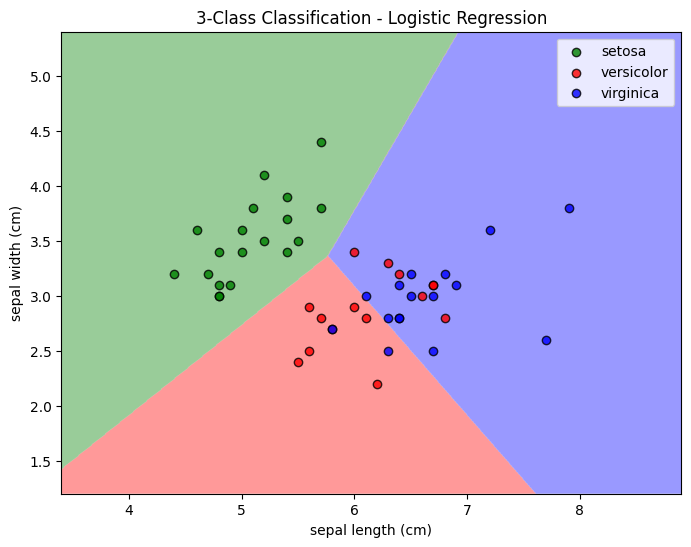

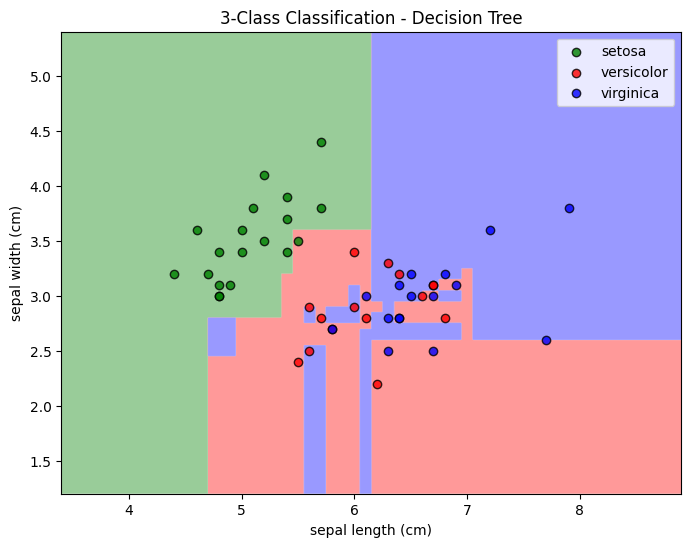

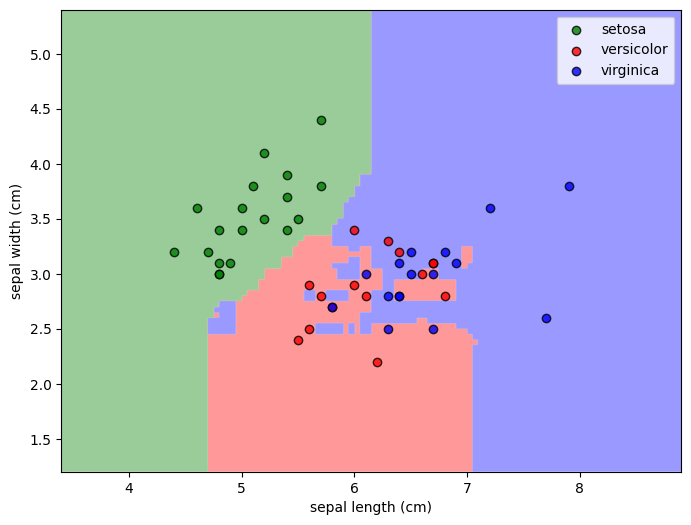

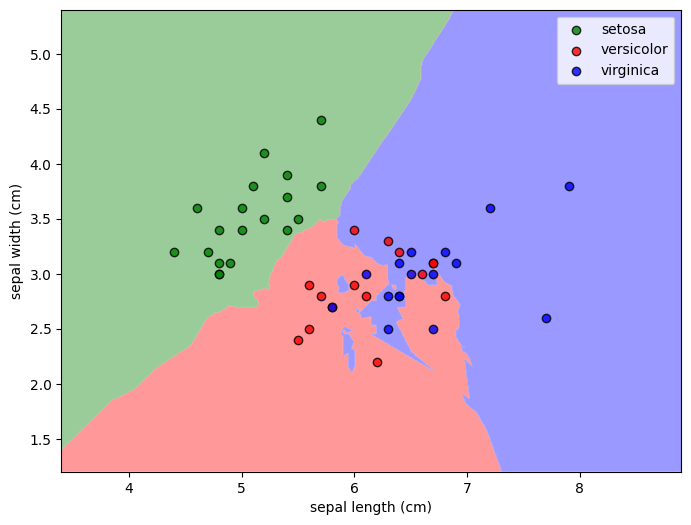

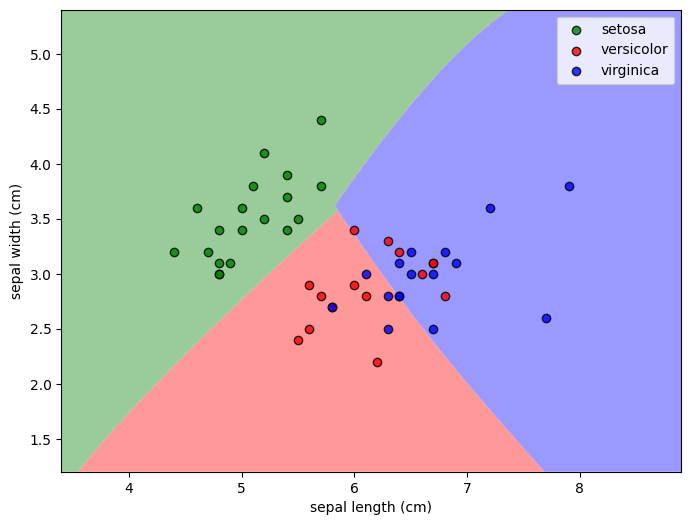

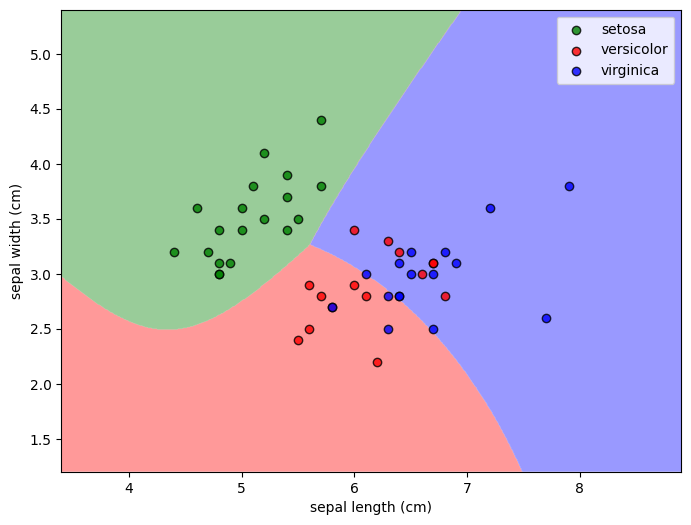

In [20]:
plot_decision_boundary(X_test, logistic_regression_model, COLORS)
plot_points(X_test, y_test, logistic_regression_model, False, features_2d, target_names, COLORS)

plot_decision_boundary(X_test, decision_tree_model, COLORS)
plot_points(X_test, y_test, decision_tree_model, False, features_2d, target_names, COLORS)

plot_decision_boundary(X_test, random_forest_model, COLORS)
plot_points(X_test, y_test, random_forest_model, False, features_2d, target_names, COLORS)

plot_decision_boundary(X_test, knn_model, COLORS)
plot_points(X_test, y_test, knn_model, False, features_2d, target_names, COLORS)

plot_decision_boundary(X_test, svm_model, COLORS)
plot_points(X_test, y_test, svm_model, False, features_2d, target_names, COLORS)

plot_decision_boundary(X_test, naive_bayes_model, COLORS)
plot_points(X_test, y_test, naive_bayes_model, False, features_2d, target_names, COLORS)



## Exercise 1

Find in the [documentation](https://scikit-learn.org/stable/supervised_learning.html) how to apply these other models to this dataset:

* *[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)*
* *[Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)*
* *[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)*
* *[k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)*
* *[Support Vector Machines (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)*

Write the results in a table and graphically for each system using the `plot_...` [above](#Plot) functions, and give a short analysis comparing the results.

## Exercise 2

* Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to all descriptors (there are 4) of the Iris dataset

* Give the ratio of the variance explained by each of the selected components, as well as their cumulative sum

* Apply one of the previous classifiers to the first two principal components

* Compare the quality of the predictions between those obtained with the first two principal components and those obtained with the first 2 descriptors (Exercise 1)

In [21]:
# It's generally recommended to split your data into training and 
# test sets first and then apply Principal Component Analysis (PCA) to both of them. 
# Here's the reasoning:

# 1. Data Leakage Prevention: If you perform PCA before splitting your data, 
# you might inadvertently include information from the test set in the PCA transformation. 
# This can lead to data leakage, where information from the test set influences the training 
# process, compromising the model evaluation.

# 2. Realistic Simulation of Deployment: Splitting the data first simulates a more realistic
# scenario where the model is trained on one set of data and tested on another. 
# This better reflects how the model will perform on new, unseen data.

from sklearn.decomposition import PCA

iris = datasets.load_iris()

features_4d = iris.feature_names
#print(features_4d)

""" Features of Sepal Length, Sepal Width, Petal Length and Petal Width """
xs_4d = df.loc[:, features_4d].values
#print(xs_4d)

""" Array of iris type 0 = Setosa, 1=Versicolour and 2= Virginica"""
ys = iris.target
#print(ys)

""" Train and Test Split just like in the 2d case but with the principal components of the PCA (the 2 most relevant ones) """
X_Train, X_Test, y_Train, y_Test = train_test_split(xs_4d, ys, test_size=0.33, random_state=42)
#print(X_Train.shape, X_Test.shape, y_Train.shape, y_Test.shape)

# Apply PCA to 4 descriptors (features)
# You can choose how many components you keep, usually n_components = min(n_samples, n_features) = min(150,4)
# However, as we don't know how important is each feature, let's compute for n_components = 2,3,4 and see the relevance of each component / feature
"""
for n_component in range(1,5):
    print(f"Components: {n_component}")
    pca = PCA(n_components = n_component)
    X_Train_pca = pca.fit_transform(X_Train)
    X_Test_pca = pca.fit_transform(X_Test)
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = explained_variance.cumsum()
    print("Variance per component:", explained_variance)
    print("Acumulative variance per number of components:", cumulative_variance, "\n")

for pos, component in enumerate(["first", "second", "third", "fourth"]):
        print(f"The {component} feature represents {explained_variance[pos]*100}$%$ of the relevance.")
"""
pca = PCA(n_components = 2)
X_Train_pca = pca.fit_transform(X_Train)
X_Test_pca = pca.transform(X_Test)

In [22]:
""" The 2 Principal components:"""
#print(X_pca[:, :2])
#print(ys.shape)
#print(X_pca.shape)

' The 2 Principal components:'

In [23]:
""" The 2 original values of the first 2 features """
#print(xs_4d[:, :2])

' The 2 original values of the first 2 features '

As you can see, in this case we can literally get rid of the third and fourth features as they don't add much information to the prediction.
Let's then consider only the first 2 features through their principal components instead of directly their original data.

---

In [24]:
""" Let's apply the prediction with the 2 principal components """

# 2. Instantiation - Calling the model
knn_model_pca = KNeighborsClassifier()
naive_bayes_model_pca = GaussianNB()
logistic_regression_model_pca = LogisticRegression()
svm_model_pca = SVC()
decision_tree_model_pca = DecisionTreeClassifier()
random_forest_model_pca = RandomForestClassifier()

# 3. Learn (fit) the models - TRAINING
# fit(X_Train, y_Train, sample_weight) 
# sample_weight = Array of weights that are assigned to individual samples. If not provided, then each sample is given unit weight.

knn_model_pca.fit(X_Train_pca, y_Train)
naive_bayes_model_pca.fit(X_Train_pca, y_Train)
logistic_regression_model_pca.fit(X_Train_pca, y_Train)
svm_model_pca.fit(X_Train_pca, y_Train)
decision_tree_model_pca.fit(X_Train_pca, y_Train)
random_forest_model_pca.fit(X_Train_pca, y_Train)

# 4. Predict on new data - PREDICTION
# model.predict predicts the class labels for samples in X_Test.

knn_predictions_pca = knn_model_pca.predict(X_Test_pca)
naive_bayes_predictions_pca = naive_bayes_model_pca.predict(X_Test_pca)
logistic_regression_predictions_pca = logistic_regression_model_pca.predict(X_Test_pca)
svm_predictions_pca = svm_model_pca.predict(X_Test_pca)
decision_tree_predictions_pca = decision_tree_model_pca.predict(X_Test_pca)
random_forest_predictions_pca = random_forest_model_pca.predict(X_Test_pca)

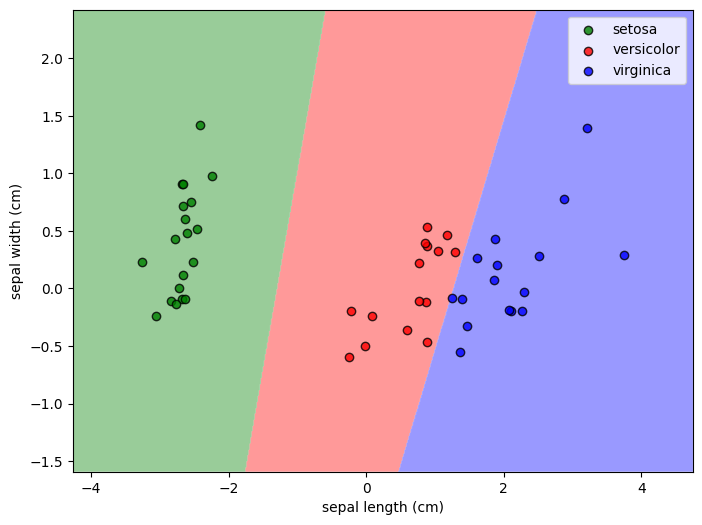

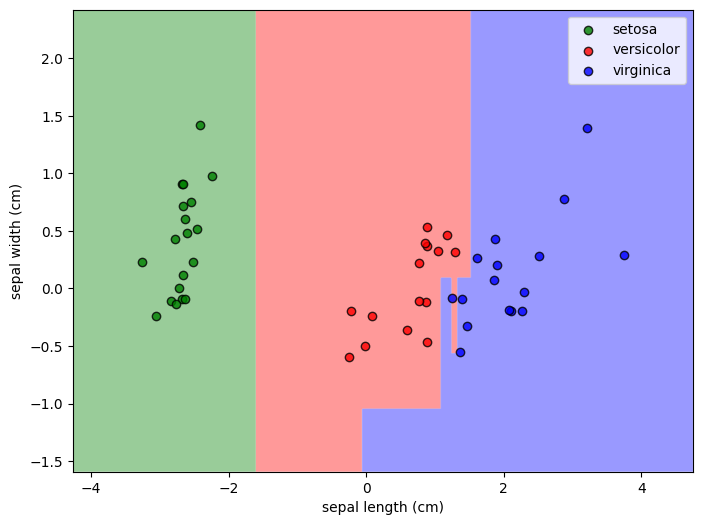

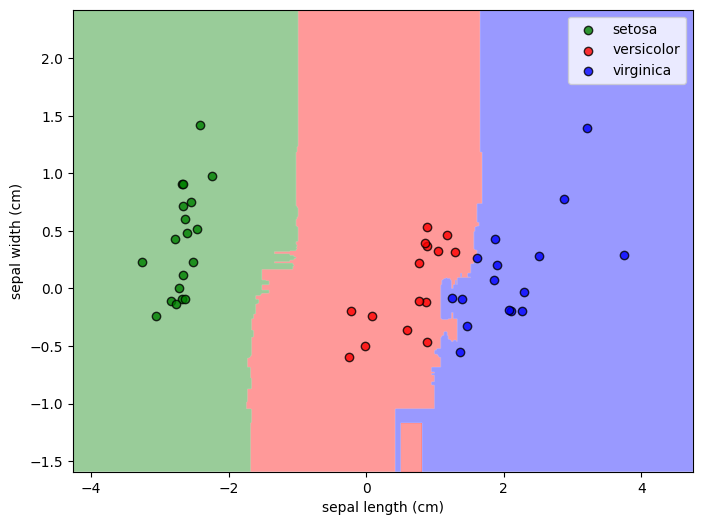

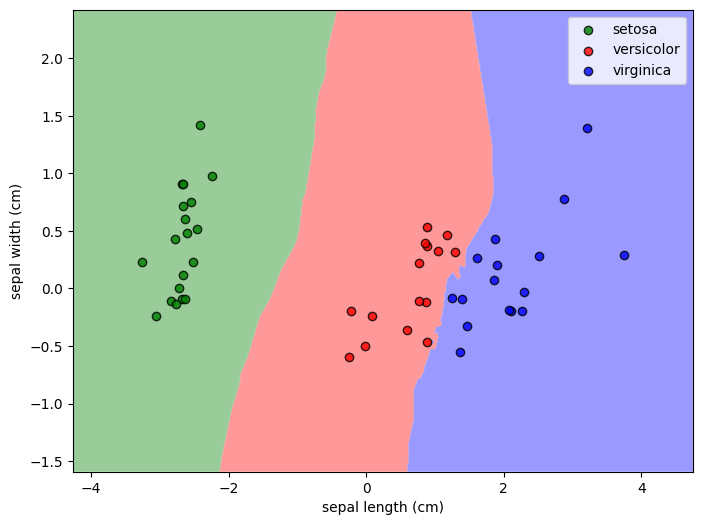

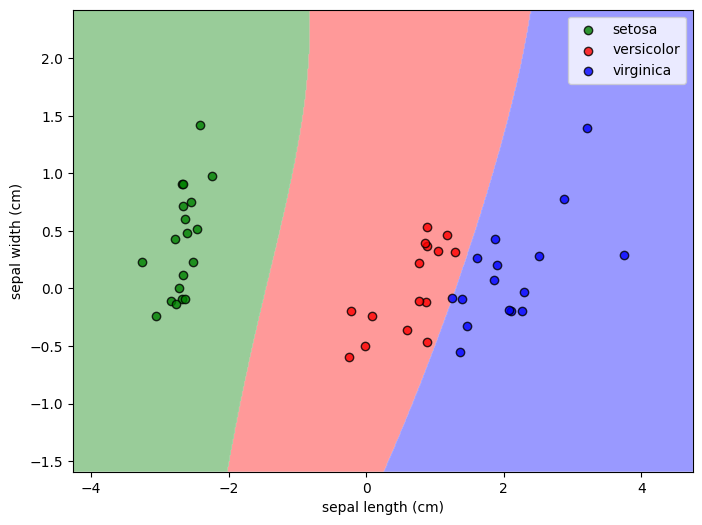

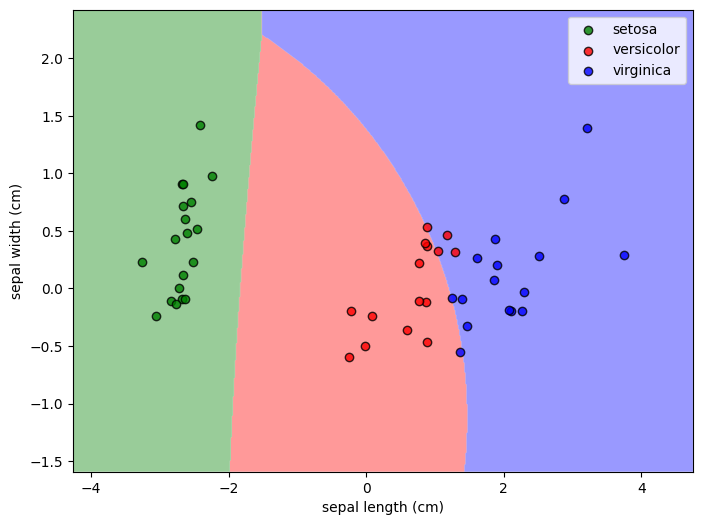

In [25]:
plot_decision_boundary(X_Test_pca, logistic_regression_model_pca, COLORS)
plot_points(X_Test_pca, y_Test, logistic_regression_model_pca, True, features_2d, target_names, COLORS)

plot_decision_boundary(X_Test_pca, decision_tree_model_pca, COLORS)
plot_points(X_Test_pca, y_Test, decision_tree_model_pca, True, features_2d, target_names, COLORS)

plot_decision_boundary(X_Test_pca, random_forest_model_pca, COLORS)
plot_points(X_Test_pca, y_Test, random_forest_model_pca, True, features_2d, target_names, COLORS)

plot_decision_boundary(X_Test_pca, knn_model_pca, COLORS)
plot_points(X_Test_pca, y_Test, knn_model_pca, True, features_2d, target_names, COLORS)

plot_decision_boundary(X_Test_pca, svm_model_pca, COLORS)
plot_points(X_Test_pca, y_Test, svm_model_pca, True, features_2d, target_names, COLORS)

plot_decision_boundary(X_Test_pca, naive_bayes_model_pca, COLORS)
plot_points(X_Test_pca, y_Test, naive_bayes_model_pca, True, features_2d, target_names, COLORS)

In [26]:
""" The performance metric that we will use is the Accuracy 
Same results as normal but I think is due to our confusion Matrix (better to do it with Sklearn) """

predictions_pca = [knn_predictions_pca, naive_bayes_predictions_pca, logistic_regression_predictions_pca, svm_predictions_pca, decision_tree_predictions_pca, random_forest_predictions_pca]
accuracy_of_predictions_pca = [metrics_accuracy(y_Pred, y_Test) for y_Pred in predictions]
print(f"""Accuracy_PCA with Confusion Matrix:\n knn_predicitons_pca: {accuracy_of_predictions[0]}
 naive_bayes_predictions_pca: {accuracy_of_predictions[1]}
 logistic_regression_predictions_pca: {accuracy_of_predictions[2]}
 svm_predictions_pca: {accuracy_of_predictions[3]}
 decision_tree_predictions_pca: {accuracy_of_predictions[4]}
 random_forest_predictions_pca: {accuracy_of_predictions[5]}
""")


# Compute Accuracy with Sklearn
from sklearn.metrics import accuracy_score

# Knn Model
accuracy_knn_predictions_pca = accuracy_score(y_Test, knn_predictions_pca)
accuracy_knn_predictions = accuracy_score(y_test, knn_predictions)

print("Knn Model")
print("Accuracy with PCA:", accuracy_knn_predictions_pca)
print("Accuracy without PCA:", accuracy_knn_predictions, "\n")

# Naive Bayes Model
accuracy_naive_bayes_predictions_pca = accuracy_score(y_Test, naive_bayes_predictions_pca)
accuracy_naive_bayes_predictions = accuracy_score(y_test, naive_bayes_predictions)

print("Naive Bayes Model")
print("Accuracy with PCA:", accuracy_naive_bayes_predictions_pca)
print("Accuracy without PCA:", accuracy_naive_bayes_predictions, "\n")

# Logistic Regression Model
accuracy_logistic_regression_predictions_pca = accuracy_score(y_Test, logistic_regression_predictions_pca)
accuracy_logistic_regression_predictions = accuracy_score(y_test, logistic_regression_predictions)

print("Logistic Regression Model")
print("Accuracy with PCA:", accuracy_logistic_regression_predictions_pca)
print("Accuracy without PCA:", accuracy_logistic_regression_predictions, "\n")

# SVM Model
accuracy_svm_predictions_pca = accuracy_score(y_Test, svm_predictions_pca)
accuracy_svm_predictions = accuracy_score(y_test, svm_predictions)

print("SVM Model")
print("Accuracy with PCA:", accuracy_svm_predictions_pca)
print("Accuracy without PCA:", accuracy_svm_predictions, "\n")

# Decision Tree Model
accuracy_decision_tree_predictions_pca = accuracy_score(y_Test, decision_tree_predictions_pca)
accuracy_decision_tree_predictions = accuracy_score(y_test, decision_tree_predictions)

print("Decision Tree Model")
print("Accuracy with PCA:", accuracy_decision_tree_predictions_pca)
print("Accuracy without PCA:", accuracy_decision_tree_predictions, "\n")

# Random Forest Model
accuracy_random_forest_predictions_pca = accuracy_score(y_Test, random_forest_predictions_pca)
accuracy_random_forest_predictions = accuracy_score(y_test, random_forest_predictions)

print("Random Forest Model")
print("Accuracy with PCA:", accuracy_random_forest_predictions_pca)
print("Accuracy without PCA:", accuracy_random_forest_predictions, "\n")

Accuracy_PCA with Confusion Matrix:
 knn_predicitons_pca: 1.00
 naive_bayes_predictions_pca: 1.00
 logistic_regression_predictions_pca: 1.00
 svm_predictions_pca: 1.00
 decision_tree_predictions_pca: 0.96
 random_forest_predictions_pca: 1.00

Knn Model
Accuracy with PCA: 1.0
Accuracy without PCA: 0.8 

Naive Bayes Model
Accuracy with PCA: 0.88
Accuracy without PCA: 0.8 

Logistic Regression Model
Accuracy with PCA: 1.0
Accuracy without PCA: 0.82 

SVM Model
Accuracy with PCA: 0.98
Accuracy without PCA: 0.78 

Decision Tree Model
Accuracy with PCA: 1.0
Accuracy without PCA: 0.66 

Random Forest Model
Accuracy with PCA: 1.0
Accuracy without PCA: 0.74 

